# Задание

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/school21/d3
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/school21/d3
/content/drive/MyDrive/school21/d3


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv')
name2question = data.iloc[0]
data.drop(0, inplace=True)

<ipython-input-5-b85cd2a21bd6>:1: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv')


## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

In [6]:
data['Q2'].value_counts()

18-21    4559
25-29    4472
22-24    4283
30-34    2972
35-39    2353
40-44    1927
45-49    1253
50-54     914
55-59     611
60-69     526
70+       127
Name: Q2, dtype: int64

Text(0.5, 1.0, 'Возраст респондента')

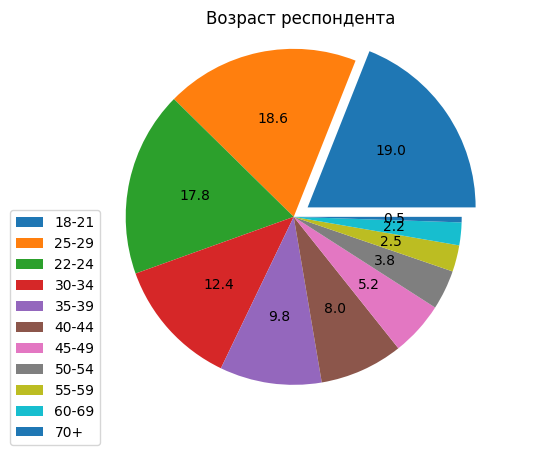

In [7]:
import numpy as np
import matplotlib.pyplot as plt


count_data = data['Q2'].value_counts()

vals = count_data.values
labels = count_data.index

fig, ax = plt.subplots()
ax.pie(vals, explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), autopct="%.1f")
ax.axis("equal")

ax.legend(labels,
          loc="center left",
          bbox_to_anchor=(-0.1, 0.2))

ax.set_title("Возраст респондента")

## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации. \
Отсортируй библиотеки по уменьшению популярности. Используй цветовую палитру 'colorblind'.

In [8]:
q15_columns = [col for col in data.columns if col.startswith('Q15')]
vizual = data[q15_columns].melt(var_name='вопрос', value_vars=q15_columns)
(vizual['value'].value_counts())

viz_dict = dict(vizual['value'].value_counts())
viz_data = pd.DataFrame(list(viz_dict.items ()), columns = ['Библиотека', 'Количество'])
viz_data

,Библиотека,Количество
0,Matplotlib,14010
1,Seaborn,10512
2,Plotly / Plotly Express,5078
3,Ggplot / ggplot2,4145
4,None,3439
5,Geoplotlib,1167
6,Shiny,1043
7,Bokeh,771
8,D3 js,734
9,Other,691


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000'),
  Text(16000.0, 0, '16000')])

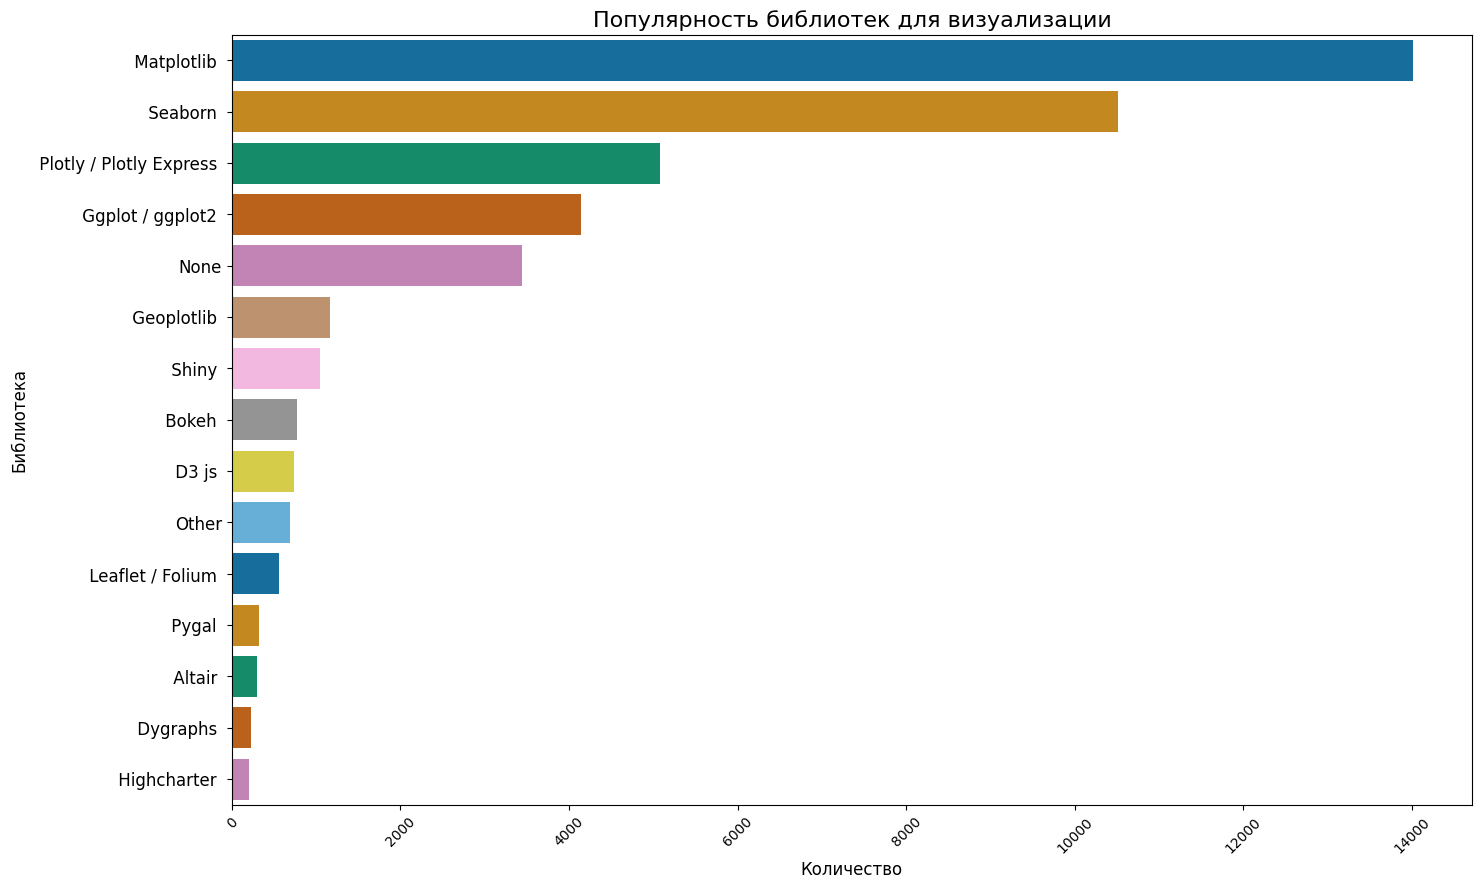

In [9]:
import seaborn as sns
plt.figure(figsize=(16, 10))
sns.barplot(viz_data, x = 'Количество', y = 'Библиотека', palette= 'colorblind')
plt.ylabel('Библиотека',size = 12 )
plt.xlabel('Количество',size = 12)
plt.yticks(fontsize = 12)
plt.title("Популярность библиотек для визуализации", fontsize = 16)
plt.xticks(rotation = 45)

## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям. \
Отсортируй специальности по убыванию медианы заработка. Используй цветовую палитру 'colorblind'

In [10]:
from statistics import mean
from statistics import median

zp_data = data[['Q29', 'Q23']].dropna()
zp_data['Q29'] = zp_data['Q29'].replace({'\$':'', '>':'', ',':''}, regex=True)
zp_data[['Q291', 'Q292']] = zp_data['Q29'].str.split('-', expand = True)
zp_data[['Q291', 'Q292']] = zp_data[['Q291', 'Q292']].astype(float)
zp_data['salary'] = zp_data[['Q291', 'Q292']].mean(axis=1).round()

zp_data = zp_data[['Q23', 'salary']]
zp_data


,Q23,salary
4,Data Scientist,27500.0
8,Software Engineer,112500.0
9,Research Scientist,112500.0
14,Developer Advocate,225000.0
17,Data Scientist,225000.0
...,...,...
23985,Data Architect,112500.0
23990,Data Scientist,2500.0
23991,Data Engineer,500.0
23995,Engineer (non-software),27500.0


Text(0.5, 1.0, 'Годовой доход по специальностям')

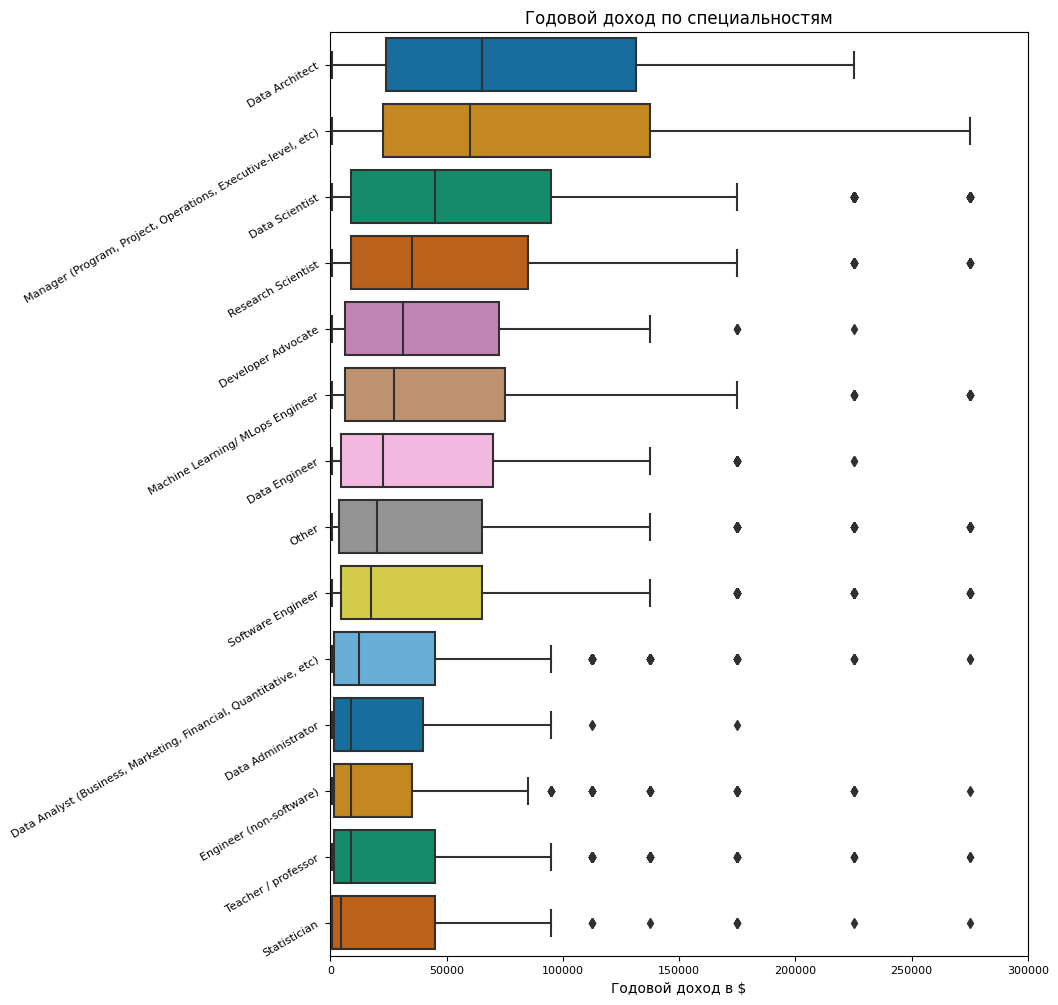

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

list(zp_data.groupby("Q23").median().sort_values("salary", ascending=False).index) #список(!) упорядоченных профессий по убыванию медианы зп
plt.figure(figsize=(9, 12))
sns.boxplot(data=zp_data, x="salary", y="Q23", order=list(zp_data.groupby("Q23").median().sort_values("salary", ascending=False).index), palette = "colorblind")
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8, rotation = 30)
plt.xlim(xmin=0, xmax=300000)
plt.ylabel(None)
plt.xlabel("Годовой доход в $", size = 10)
plt.title("Годовой доход по специальностям", fontsize = 12)


## Задание 4
Используя модуль graph_objects из библиотеки plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer,
Research Scientist, Software Engineer, Data Architect. \
Цвета в этом задании не важны

In [12]:
from seaborn.axisgrid import FacetGrid
job_titles = ["Data Administrator", "Data Analyst", "Data Engineer", "Data Scientist", "Engineer", "MLops Engineer", "Research Scientist", "Software Engineer", "Data Architect"]
job_regex =  "((^|/ )((" +  ")|(".join(job_titles) + ")))"


age_data = data[["Q2","Q23"]].copy()
age_data["Q23"] = age_data.Q23.str.extract(job_regex, expand = False)[2]
age_data = age_data.dropna()


import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=3, subplot_titles = [ "<b><i>" + x +"</i></b>" for x in job_titles] )
trace_dict = {}
for job, group in age_data.groupby("Q23"):
    cur_gr = group["Q2"].value_counts().sort_index()
    trace_dict[job]=go.Bar(x=cur_gr.index, y=cur_gr, name=job)
k = 0
for i in range(1,4):
  for j in range(1,4):
      fig.add_trace(trace_dict[job_titles[k]], row = i, col = j)
      k = k+1


fig.update_layout( width = 900, height = 600, title = "<i>Распределение возрастов по специальностям</i>",   margin = dict(t=80))
fig.show()


In [13]:
from numpy.core.fromnumeric import size
from matplotlib.cbook import index_of
from seaborn.axisgrid import FacetGrid
job_titles = ["Data Administrator", "Data Analyst", "Data Engineer", "Data Scientist", "Engineer", "MLops Engineer", "Research Scientist", "Software Engineer", "Data Architect"]
job_regex =  "((^|/ )((" +  ")|(".join(job_titles) + ")))"


age_data = data[["Q2","Q23"]].copy()
age_data["Q23"] = age_data.Q23.str.extract(job_regex, expand = False)[2]
age_data = age_data.dropna()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=3, subplot_titles = [ "<b><i>" + x +"</i></b>" for x in job_titles])
for job, group in age_data.groupby("Q23"):
    k = job_titles.index(job)
    cur_gr = group["Q2"].value_counts().sort_index()
    fig.add_trace(go.Bar(x=cur_gr.index, y=cur_gr, name=job), row = k//3 +1, col = k%3 +1)

fig.update_layout( width = 900, height = 600, title = "<em>Распределение возрастов по специальностям</em>", margin = dict(t=80))
fig.show()



## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом вам поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/). \
В аргументах функции укажи параметр color_continuous_scale="Viridis".

In [14]:
countres = data['Q4'].value_counts().reset_index()
countres.columns =['country', 'val']

import plotly.express as px
fig = px.choropleth(countres, locations='country', color='val',
                    color_continuous_scale="Viridis",
                    range_color=(0, 1000),
                    labels = {'val':'Количество респондентов'},
                    locationmode='country names',
                    title = "Карта мира")

fig.update_layout(title_x=0.5)
fig.show()

## Задание 6 - Дополнительное

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/).
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками. \
Загрузи итоговую визуализацию на гит в формате .gif.

In [19]:
import bar_chart_race as bcr

job_titles = ["Data Administrator", "Data Analyst", "Data Engineer", "Data Scientist", "Engineer", "MLops Engineer", "Research Scientist", "Software Engineer", "Data Architect"]
job_regex =  "((^|/ )((" +  ")|(".join(job_titles) + ")))"

age_c_data = data[["Q4","Q23"]].copy()
age_c_data["Q23"] = age_c_data.Q23.str.extract(job_regex, expand = False)[2]
age_c_data = age_c_data.dropna()
age_c_data
df = pd.crosstab(age_c_data["Q23"], age_c_data["Q4"], margins=True)
df

Q4,Algeria,Argentina,Australia,Bangladesh,Belgium,Brazil,Cameroon,Canada,Chile,China,...,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Viet Nam,Zimbabwe,All
Q23,,,,,,,,,,,,,,,,,,,,,
Data Administrator,0,4,0,1,0,1,0,0,3,1,...,1,0,1,0,0,1,9,0,0,70
Data Analyst,2,13,5,15,1,59,5,25,10,19,...,6,2,19,7,10,17,235,9,6,1538
Data Architect,0,0,0,1,1,4,0,2,0,2,...,1,0,1,0,0,1,26,0,0,95
Data Engineer,0,3,5,0,1,14,0,4,1,9,...,4,0,5,1,0,5,53,4,0,352
Data Scientist,1,21,23,5,11,67,1,36,16,12,...,6,7,39,7,10,50,354,6,2,1929
Engineer,0,4,0,2,0,18,3,3,4,7,...,9,2,8,2,4,1,60,7,2,465
MLops Engineer,0,5,5,8,3,7,2,5,1,17,...,4,1,14,0,4,9,81,9,0,571
Research Scientist,3,6,3,1,5,22,1,13,3,7,...,5,3,10,2,2,13,134,8,0,593
Software Engineer,1,3,6,7,5,28,0,9,6,26,...,6,2,10,3,5,10,138,2,1,980


In [21]:

bcr.bar_chart_race(
    df=df,
    filename='job.gif',
    orientation='v',
    n_bars=10,
    fixed_order=False,
    fixed_max=False,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='Распределение IT-специальностей по странам',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7})

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:292: UserWarning:

Glyph 127 () missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:292: UserWarning:

Glyph 128 (\x80) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:294: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:295: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:260: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

